# Machine Learning at CoDaS-HEP 2024, Lesson 1 Part 2

<br><br><br><br><br>

## Reminders

As a reminder, a (fully-connected, feed-forward, 4-layer) neural network looks like this:

<img src="../img/artificial-neural-network-layers-2.svg" width="700">

<br><br><br><br><br>

Which is to say, like this:

$$
y_i =
f\left(a_{i,j}^{\mbox{\scriptsize L3-L4}} \cdot
f\left(a_{i,j}^{\mbox{\scriptsize L2-L3}} \cdot
f\left(a_{i,j}^{\mbox{\scriptsize L1-L2}} \cdot x_j + b_i^{\mbox{\scriptsize L1-L2}}\right)
+ b_i^{\mbox{\scriptsize L2-L3}}\right)
+ b_i^{\mbox{\scriptsize L3-L4}}\right)
$$

<br><br><br><br><br>

In code, it could be implemented as:

In [1]:
import numpy as np

In [2]:
# take 8-dimensional input layer 1 to 7-dimensional hidden layer 2
a_L1_L2 = np.random.normal(0, 1, (7, 8))
b_L1_L2 = np.random.normal(0, 1, (7,))

# take 7-dimensional hidden layer 2 to 9-dimensional hidden layer 3
a_L2_L3 = np.random.normal(0, 1, (9, 7))
b_L2_L3 = np.random.normal(0, 1, (9,))

# take 9-dimensional hidden layer 3 to 6-dimensional output layer 4
a_L3_L4 = np.random.normal(0, 1, (6, 9))
b_L3_L4 = np.random.normal(0, 1, (6,))

def relu(x):
    return np.maximum(0, x)

def model(x):
    layer1 = x
    layer2 = relu(a_L1_L2 @ layer1 + b_L1_L2)
    layer3 = relu(a_L2_L3 @ layer2 + b_L2_L3)
    layer4 = relu(a_L3_L4 @ layer3 + b_L3_L4)
    y = layer4
    return y

Here's the model's output for a sample input:

In [3]:
x = np.random.normal(0, 1, (8,))

model(x)

array([ 0.        ,  0.        ,  5.63932608,  0.        , 17.69329489,
       10.88563834])

<br><br><br><br><br>

Given a large dataset of `x` vectors, an equally large set of expected `y` vectors, and a minimizer, we could train the model by optimizing these parameters:

In [4]:
a_L1_L2

array([[-0.80773427,  0.89130729,  0.05898565, -1.15903106, -0.08030201,
         0.34007536,  2.11741198, -1.06660221],
       [ 1.73383846, -0.23788098,  0.48785581,  2.59838693, -0.47643888,
         0.65785569,  0.0081544 ,  2.47601677],
       [-0.06261777,  1.77409186, -0.19741033,  2.45075912, -0.87278393,
        -1.04975234,  0.91315236, -0.57484168],
       [-0.28051332,  0.17951041, -1.45096099,  1.23641471,  1.18700676,
        -1.71541339, -1.60114453, -0.52235443],
       [-0.27331007, -0.24141187, -0.156074  ,  0.18598707, -0.7210339 ,
         1.32173099, -0.64973433, -0.50447329],
       [-2.7407207 , -0.89459286,  0.08998831,  1.8000399 , -0.75943285,
         0.20596074, -0.79848572,  1.04414331],
       [ 0.81142867,  0.0174411 ,  2.28047009, -0.08905222, -0.43943664,
         0.12767552,  2.2636807 , -0.51260154]])

In [5]:
b_L1_L2

array([-0.24347415,  1.26641022, -0.13692132, -1.04293207, -0.93070446,
       -0.20404476,  0.46290927])

In [6]:
a_L2_L3

array([[ 1.57126967,  0.23922091,  0.39280927, -1.18652952, -0.6103565 ,
         0.5874009 ,  0.31438922],
       [-0.06839539,  0.93869574,  1.43932337,  0.730286  ,  0.37010626,
         1.90283573, -0.16261927],
       [ 0.18886815,  1.05071122,  0.50468695,  0.51486657, -1.16870564,
        -2.01922151, -0.85205077],
       [ 0.26476704,  0.46361118,  1.6897579 , -0.92386419, -0.03204012,
        -1.21479377, -1.19103733],
       [-1.106875  , -0.00378863, -0.16011409,  1.25853168,  2.18978062,
         0.73382632,  1.3913284 ],
       [-1.91774463, -0.54378018,  0.43175131, -1.72983754,  1.72795285,
         0.0358995 , -1.05484092],
       [ 1.49229016, -0.08969624,  1.25931206,  0.08990646,  1.98862887,
        -1.2074132 , -0.53250155],
       [ 0.36043395,  0.64880074,  1.0919059 ,  0.35281985, -1.47922629,
        -0.97352281, -0.3370577 ],
       [-0.99785354,  0.17444692, -0.11026914, -0.06006152, -0.20231448,
         0.5693052 ,  0.99630382]])

In [7]:
b_L2_L3

array([ 0.50291797, -0.94988904,  0.14541535, -0.14226884, -0.96221162,
       -0.65686386, -1.73823523,  0.98645251,  0.34511473])

In [8]:
a_L3_L4

array([[-2.01134314, -0.6530646 , -0.88229039, -0.08388267, -1.26244048,
        -0.58332339,  0.38121137, -1.0549222 , -1.39336358],
       [-0.10209692,  1.14346103,  0.66696731, -0.59378884, -0.55151703,
        -1.29092902, -0.79631899, -1.35902628,  0.31541862],
       [-0.1993305 ,  0.61748071, -0.04085942, -0.17717991,  0.73391626,
         0.88596103, -1.51621346,  1.28683204, -1.49752672],
       [ 1.13393557, -0.84396454, -2.3112314 ,  1.42429852,  1.11692625,
         0.99200809, -0.740478  ,  0.44921165,  0.24686753],
       [-0.73282721,  1.79086724, -0.1754948 ,  0.03159279,  0.84819679,
        -0.66282232,  0.93661026,  0.11394242,  1.59937729],
       [-0.62835145,  0.28197229,  0.54298324,  1.12729855, -0.89108525,
        -0.6639105 ,  2.5832151 , -0.06068563,  0.67893701]])

In [9]:
b_L3_L4

array([ 0.08413195, -1.50777379,  0.43239183,  0.074321  ,  2.02612904,
       -1.21584635])

such that `model(x)` comes as close as possible to `y`.

Then we could use `model(x_new)` to predict new $y$ values for `x_new`, and the predictions would have (roughly) the same correlations as the training dataset.

<br><br><br><br><br>

HEP has a favorite minimizer: MINUIT.

Introduced in 1972 by Fred James, MINUIT computes numerical second derivatives of the function, attempts to jump to the minimum, and then recomputes.

<img src="../img/minuit-1975.png" width="1000">

<br><br><br><br><br>

It doesn't scale well with a large number of parameters to optimize, and we would have

In [10]:
a_L1_L2.size + b_L1_L2.size + a_L2_L3.size + b_L2_L3.size + a_L3_L4.size + b_L3_L4.size

195

parameters to optimize in this simple example.

Nevertheless, I'll use MINUIT for some early examples, through the excellent iminuit package.

<img src="https://raw.githubusercontent.com/scikit-hep/iminuit/develop/doc/_static/iminuit_logo.svg" width="300">

In [11]:
import iminuit

<br><br><br><br><br>

As another simplification, note that we don't have to maintain the distinction between matrices of parameters $a_{i,j}$ and vectors of parameters $b_i$:

$$
\left(\begin{array}{c c c c}
a_{1,1} & a_{1,2} & \ldots & a_{1,10} \\
a_{2,1} & a_{2,2} & \ldots & a_{2,10} \\
a_{3,1} & a_{3,2} & \ldots & a_{3,10} \\
a_{4,1} & a_{4,2} & \ldots & a_{4,10} \\
a_{5,1} & a_{5,2} & \ldots & a_{5,10} \\
\end{array}\right) \cdot \left(\begin{array}{c}
x_1 \\
x_2 \\
\vdots \\
x_{10} \\
\end{array}\right) + \left(\begin{array}{c}
b_1 \\
b_2 \\
b_3 \\
b_4 \\
b_5 \\
\end{array}\right)
$$

is the same as

$$
\left(\begin{array}{c c c c c}
a_{1,1} & a_{1,2} & \ldots & a_{1,10} & b_1 \\
a_{2,1} & a_{2,2} & \ldots & a_{2,10} & b_2 \\
a_{3,1} & a_{3,2} & \ldots & a_{3,10} & b_3 \\
a_{4,1} & a_{4,2} & \ldots & a_{4,10} & b_4 \\
a_{5,1} & a_{5,2} & \ldots & a_{5,10} & b_5 \\
\end{array}\right) \cdot \left(\begin{array}{c}
x_1 \\
x_2 \\
\vdots \\
x_{10} \\
1 \\
\end{array}\right)
$$

We can absorb our $b_i$ vectors into a bigger matrix $A_{i,j}$ with the understanding that we concatenate a $1$ at the end of the $x_j$ vector.

<br><br><br><br><br>

## What's so special about this linear-nonlinear sandwich?

The goal of curve-fitting is to _approximate a function_ from noisy samples.

Neural networks are special because they are exceptionally good at approximating functions, a fact that is formally expressed as the [universal approximation theorem(s)](https://en.wikipedia.org/wiki/Universal_approximation_theorem).

<br><br><br><br><br>

As a physicist, I've approximated a few functions in my time. What's "exceptionally good" about this method?

<br><br><br><br><br>

### Demonstrate with a sample problem

Suppose $x$ and $y$ are related as

$$ y = \left\{\begin{array}{l l}
\sin(22 x) & \mbox{if } |x - 0.43| < 0.15 \\
-1 + 3.5 x - 2 x^2 & \mbox{otherwise} \\
\end{array}\right. $$

with small errors.

In [12]:
def truth(x):
    return np.where(abs(x - 0.43) < 0.15, np.sin(22*x), -1 + 3.5*x - 2*x**2)

x = np.random.uniform(0, 1, 1000)
y = truth(x) + np.random.normal(0, 0.03, 1000)

<br><br>

In [13]:
import matplotlib.pyplot as plt

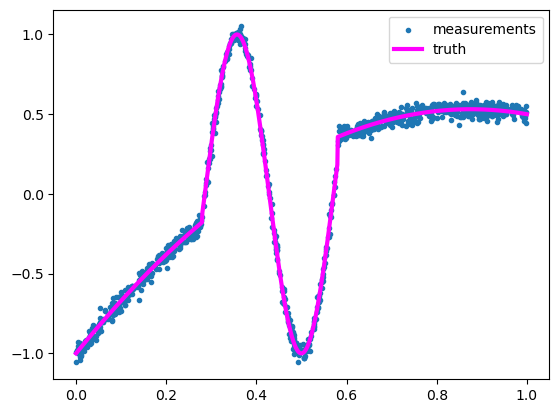

In [14]:
fig, ax = plt.subplots()

ax.scatter(x, y, marker=".")
ax.plot(np.linspace(0, 1, 1000), truth(np.linspace(0, 1, 1000)), color="magenta", linewidth=3)

ax.legend(["measurements", "truth"])

None

<br><br><br><br><br>

### Attempt 1: a linear fit

A linear fit is terrible because the curve isn't close to being linear.

In [15]:
# a linear fit can be computed analytically, which is nice
sum1 = len(x)
sumx = np.sum(x)
sumy = np.sum(y)
sumxx = np.sum(x**2)
sumxy = np.sum(x * y)
delta = (sum1 * sumxx) - (sumx * sumx)

slope = ((sum1 * sumxy) - (sumx * sumy)) / delta
intercept = ((sumxx * sumy) - (sumx * sumxy)) / delta

model_x = np.linspace(0, 1, 1000)
model_y = slope * model_x + intercept

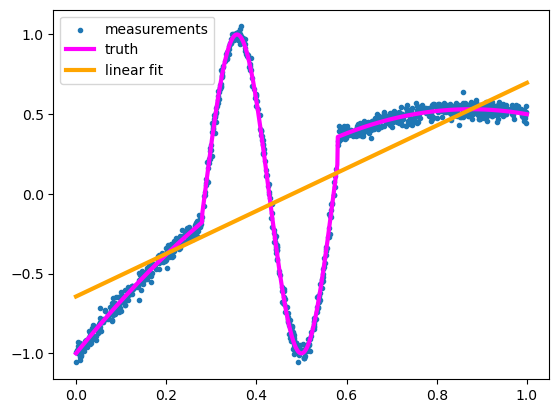

In [16]:
fig, ax = plt.subplots()

ax.scatter(x, y, marker=".")
ax.plot(np.linspace(0, 1, 1000), truth(np.linspace(0, 1, 1000)), color="magenta", linewidth=3)
ax.plot(model_x, model_y, color="orange", linewidth=3)

ax.legend(["measurements", "truth", "linear fit"])

None

<br><br><br><br><br>

### Attempt 2: a theory-driven ansatz

A physicist's usual strategy is to find the underlying theory, with configurable parameters for the unknown values.

This parameterizable function is called an "ansatz".

Suppose we _just know_ that the functional form is

$$ y = \left\{\begin{array}{l l}
\sin(C x) & \mbox{if } |x - A| < B \\
D + E x + F x^2 & \mbox{otherwise} \\
\end{array}\right. $$

for some $A$, $B$, $C$, $D$, $E$, $F$.

In [17]:
def ansatz(x, A, B, C, D, E, F):
    return np.where(abs(x - A) < B, np.sin(C*x), D + E*x + F*x**2)

In [18]:
from iminuit.cost import LeastSquares

In [19]:
# define a loss function that is minimized when the parameterized ansatz is equal to truth
least_squares = LeastSquares(x, y, 0.03, ansatz)

# set initial parameter values
minimizer = iminuit.Minuit(least_squares, A=0.43, B=0.15, C=22, D=-1, E=3.5, F=-2)
minimizer.migrad()

model_x = np.linspace(0, 1, 1000)
model_y = ansatz(model_x, **{p.name: p.value for p in minimizer.params})

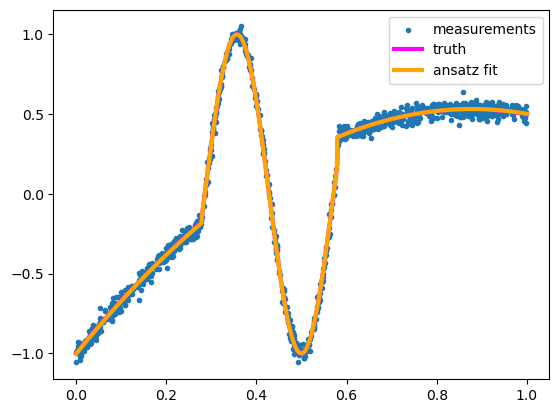

In [20]:
fig, ax = plt.subplots()

ax.scatter(x, y, marker=".")
ax.plot(np.linspace(0, 1, 1000), truth(np.linspace(0, 1, 1000)), color="magenta", linewidth=3)
ax.plot(model_x, model_y, color="orange", linewidth=3)

ax.legend(["measurements", "truth", "ansatz fit"])

None

<br><br>

It's a great fit, but

* what if we don't know the functional form? or if it's super-complicated, like human behavior?
* the fit depends sensitively on the initial parameters and step size (try starting any of the parameters at the wrong value).

Minuit was designed as an interactive program so that users could hand-tweak their fits.

How many of you ever had to tinker with a fit until it converged?

<br><br><br><br><br>

### Attempt 3: orthonormal basis functions

As physicists, we would approach a _generic_ unknown function with a [Taylor series](https://en.wikipedia.org/wiki/Taylor_series), a [Fourier series](https://en.wikipedia.org/wiki/Fourier_series), or other sum of orthonormal basis functions ([Jacobi](https://en.wikipedia.org/wiki/Jacobi_polynomials), [Laguerre](https://en.wikipedia.org/wiki/Laguerre_polynomials), [Hermite](https://en.wikipedia.org/wiki/Hermite_polynomials), [Chebyshev](https://en.wikipedia.org/wiki/Chebyshev_polynomials), ...).

In [21]:
NUMBER_OF_POLYNOMIAL_TERMS = 15

# NumPy has a function for polynomial fits (which is analytic because
# it can be rewritten as a linear fit in the polynomial coefficients)
coefficients = np.polyfit(x, y, NUMBER_OF_POLYNOMIAL_TERMS - 1)[::-1]

model_x = np.linspace(0, 1, 1000)
model_y = sum(c * model_x**i for i, c in enumerate(coefficients))

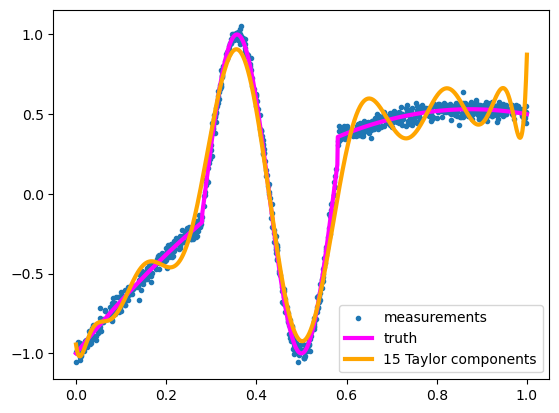

In [22]:
fig, ax = plt.subplots()

ax.scatter(x, y, marker=".")
ax.plot(np.linspace(0, 1, 1000), truth(np.linspace(0, 1, 1000)), color="magenta", linewidth=3)
ax.plot(model_x, model_y, color="orange", linewidth=3)

ax.legend(["measurements", "truth", f"{len(coefficients)} Taylor components"])

None

<br><br><br><br><br>

In [23]:
NUMBER_OF_COS_TERMS = 7
NUMBER_OF_SIN_TERMS = 7

# NumPy's FFT doesn't apply because the data aren't uniformly spaced, but we can compute a Fourier series with integrals
# Like the linear fit and the Taylor series, this is an analytic fit.
sort_index = np.argsort(x)
x_sorted = x[sort_index]
y_sorted = y[sort_index]

constant_term = np.trapz(y_sorted, x_sorted)
cos_terms = [2*np.trapz(y_sorted * np.cos(2*np.pi * (i + 1) * x_sorted), x_sorted) for i in range(NUMBER_OF_COS_TERMS)]
sin_terms = [2*np.trapz(y_sorted * np.sin(2*np.pi * (i + 1) * x_sorted), x_sorted) for i in range(NUMBER_OF_SIN_TERMS)]

model_x = np.linspace(0, 1, 1000)
model_y = (
    constant_term +
    sum(coefficient * np.cos(2*np.pi * (i + 1) * model_x) for i, coefficient in enumerate(cos_terms)) +
    sum(coefficient * np.sin(2*np.pi * (i + 1) * model_x) for i, coefficient in enumerate(sin_terms))
)

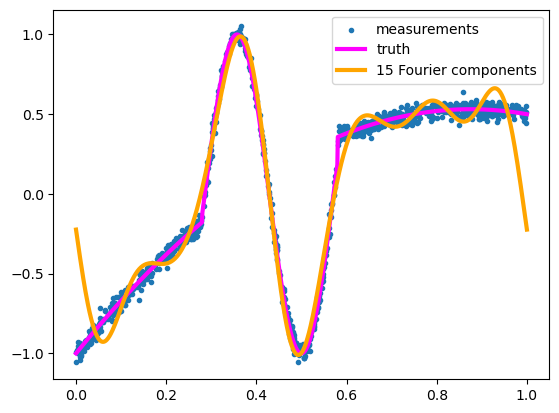

In [24]:
fig, ax = plt.subplots()

ax.scatter(x, y, marker=".")
ax.plot(np.linspace(0, 1, 1000), truth(np.linspace(0, 1, 1000)), color="magenta", linewidth=3)
ax.plot(model_x, model_y, color="orange", linewidth=3)

ax.legend(["measurements", "truth", f"{1 + len(cos_terms) + len(sin_terms)} Fourier components"])

None

<br><br>

Since the true function is neither polynomial nor sinusoidal, many terms are needed for convergence.

When only a few terms are used, the fit has irrelevant artifacts (wiggles).

<br><br><br><br><br>

### Attempt 4: adaptive basis functions

The classical methods (Taylor, Fourier, etc.) have one thing in common: they all use a fixed function $\psi_i$ for each $i$:

$$ f(x) = \sum_i^N c_i \psi_i(x) $$

and are only allowed to optimize the coefficients $c_i$ in front of each function.

<br><br><br><br><br>

Suppose, instead, we had a set of functions that could also _change shape_:

$$ f(x) = \sum_i^N c_i \psi(x; \alpha_i, \beta_i) $$

For instance, the functions are sigmoids whose center $\alpha$ and width $\beta$ are adjustable:

$$ \psi(x; \alpha, \beta) = \frac{1}{1 + \exp\big((x - \alpha)/\beta\big)} $$

In [25]:
def sigmoid_component(x, center, width):
    # ignore NumPy errors when Minuit explores extreme values
    with np.errstate(over="ignore", divide="ignore"):
        return 1 / (1 + np.exp((x - center) / width))

<br><br><br><br><br>

A few examples:

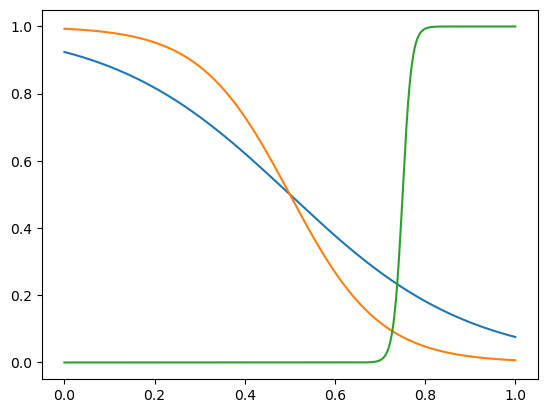

In [26]:
fig, ax = plt.subplots()

model_x = np.linspace(0, 1, 1000)

ax.plot(model_x, sigmoid_component(model_x, 0.5, 0.2))
ax.plot(model_x, sigmoid_component(model_x, 0.5, 0.1))
ax.plot(model_x, sigmoid_component(model_x, 0.75, -0.01))

None

<br><br><br><br><br>

Now use the adaptive sigmoids in the fit:

In [27]:
NUMBER_OF_SIGMOIDS = 5

def sigmoid_sum(x, parameters):
    out = np.zeros_like(x)
    for coefficient, center, width in parameters.reshape(-1, 3):
        out += coefficient * sigmoid_component(x, center, width)
    return out

# using Minuit again
least_squares = LeastSquares(x, y, 0.03, sigmoid_sum)

# do best of 15 optimizations because this space has a lot more local minima
best_minimizer = None
for iteration in range(15):

    initial_parameters = np.zeros(5 * 3)
    initial_parameters[0::3] = np.random.normal(0, 1, NUMBER_OF_SIGMOIDS)    # coefficient terms
    initial_parameters[1::3] = np.random.uniform(0, 1, NUMBER_OF_SIGMOIDS)   # center parameters (alpha)
    initial_parameters[2::3] = np.random.normal(0, 0.1, NUMBER_OF_SIGMOIDS)  # width parameters (beta)

    minimizer = iminuit.Minuit(least_squares, initial_parameters)
    minimizer.migrad()

    if best_minimizer is None or minimizer.fval < best_minimizer.fval:
        best_minimizer = minimizer

model_x = np.linspace(0, 1, 1000)
model_y = sigmoid_sum(model_x, np.array(best_minimizer.values))

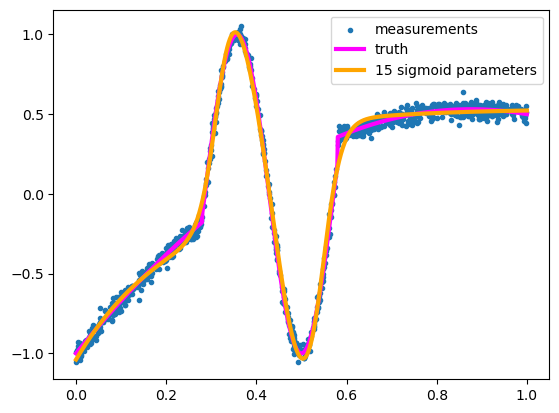

In [28]:
fig, ax = plt.subplots()

ax.scatter(x, y, marker=".")
ax.plot(np.linspace(0, 1, 1000), truth(np.linspace(0, 1, 1000)), color="magenta", linewidth=3)
ax.plot(model_x, model_y, color="orange", linewidth=3)

ax.legend(["measurements", "truth", f"{len(minimizer.parameters)} sigmoid parameters"])

None

<br><br><br><br><br>

The fitter doesn't need very many sigmoids because it can position each one and stretch it arbitrarily.

It can even stack them to build piecewise shapes.

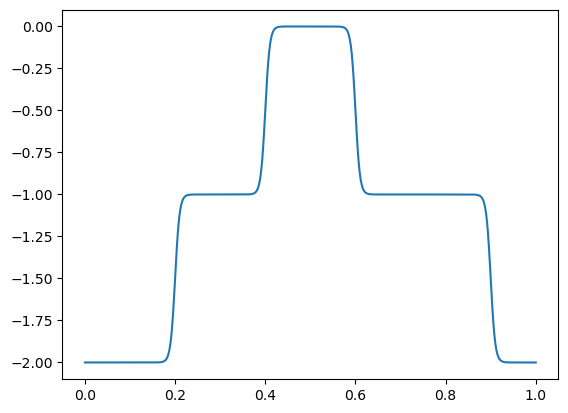

In [29]:
fig, ax = plt.subplots()

model_x = np.linspace(0, 1, 1000)

wide_plateau_left = sigmoid_component(model_x, 0.2, 0.005)
wide_plateau_right = sigmoid_component(model_x, 0.9, -0.005)

narrow_peak_left = sigmoid_component(model_x, 0.4, 0.005)
narrow_peak_right = sigmoid_component(model_x, 0.6, -0.005)

ax.plot(model_x, -wide_plateau_left - wide_plateau_right - narrow_peak_left - narrow_peak_right)

None

<br><br><br><br><br>

### The important point: adaptive basis functions _are_ a neural network layer

Instead of a parameterized sigmoid,

$$ \psi(x; \alpha, \beta) = \frac{1}{1 + \exp\big((x - \alpha)/\beta\big)} $$

consider applying a linear transformation to the input of a sigmoid:

$$
x^{\mbox{\scriptsize layer 2}} = \frac{x^{\mbox{\scriptsize layer 1}} - \alpha}{\beta}
\mbox{\hspace{1 cm}and\hspace{1 cm}}
f(x^{\mbox{\scriptsize layer 2}}) = \frac{1}{1 + \exp\big( x^{\mbox{\scriptsize layer 2}} \big)}
$$

<br><br><br><br><br>

5 independently scaled sigmoids are a single hidden layer with 5 nodes:

$$
y =
c_i^{\mbox{\scriptsize L2--L3}} \cdot
f\left(\frac{x - \alpha_i^{\mbox{\scriptsize L1-L2}}}{\beta_i^{\mbox{\scriptsize L1-L2}}}\right)
$$

The 5 $\alpha$ and 5 $\beta$ parameters are the linear transformation from the input layer 1 to the hidden layer 2, the sigmoid $f$ is the activation function applied at this layer, and the coefficients in front of each sigmoid $c$ are the linear transformation from layer 2 to the output layer 3.

<img src="../img/artificial-neural-network-layers-3.svg" width="700">

<br><br><br><br><br>

To further demonstrate this, let's use a neural network implementation from Scikit-Learn to fit the same data.

In [30]:
import sklearn.neural_network

In [31]:
# do best of 15 optimizations because this space has a lot of local minima
best_neural_network = None
for iteration in range(15):

    # Scikit-Learn's MLPRegressor uses ordinary least squares as a loss function
    # the "logistic" activation function is our sigmoid
    neural_network = sklearn.neural_network.MLPRegressor(
        activation="logistic", hidden_layer_sizes=(5,),
        solver="lbfgs", max_iter=10000, alpha=0,
    )
    
    neural_network.fit(x[:, np.newaxis], y)

    if best_neural_network is None or neural_network.loss_ < best_neural_network.loss_:
        best_neural_network = neural_network

model_x = np.linspace(0, 1, 1000)
model_y = best_neural_network.predict(model_x[:, np.newaxis])

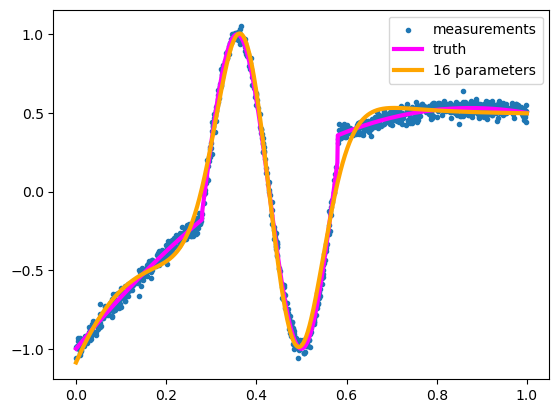

In [32]:
fig, ax = plt.subplots()

ax.scatter(x, y, marker=".")
ax.plot(np.linspace(0, 1, 1000), truth(np.linspace(0, 1, 1000)), color="magenta", linewidth=3)
ax.plot(model_x, model_y, color="orange", linewidth=3)

num_params = sum(x.size for x in neural_network.coefs_) + sum(x.size for x in neural_network.intercepts_)
ax.legend(["measurements", "truth", f"{num_params} parameters"])

None

(A real neural network has one more bias term per output variable than our analogy, so 16 parameters, not 15.)

<br><br><br><br><br>

Thus, a neural network with a hidden layer is a function approximator like Taylor and Fourier series, but with a special property: _the basis functions are adaptive_.

<br><br>

One consequence of this is that the basis functions are not orthogonal, like Taylor and Fourier series.

* Since Taylor and Fourier basis functions are orthogonal, each coefficient can be determined independently.
* Since a neural network's adaptive basis functions are not, they _must_ be determined by a combined fit.

<br><br>

In fact, many parameters can be swapped: if $\{ \alpha_i \mbox{, } \beta_i \mbox{, } c_i \} \longleftrightarrow \{ \alpha_j \mbox{, } \beta_j \mbox{, } c_j \}$ for sigmoids $i$ and $j$, the function output is unchanged.

* Each minimum in the optimizer's objective function has $n!$ identical minima, for each hidden layer of size $n$.
* Two neural networks that return the same output for all possible input could have very different internal parameters.

<br><br>

[It's a bumpy objective function!](https://www.cs.umd.edu/~tomg/projects/landscapes/)

<img src="../img/loss-visualization-noshort.png" width="400">

<br><br><br><br><br>

**This is what I mean by "farming": ML doesn't eliminate all difficulties, it replaces one set of problems with another.**

<table>
    <tr style="background: white";>
        <td><img src="make-talk/img/craftsmanship.jpg" width="300"></td>
        <td><img src="make-talk/img/farming.jpg" width="300"></td>
    </tr>
</table>

Optimizing a neural network requires far less detailed knowledge of the function than the ansatz fit.

But it requires more attention to the network architecture and the minimizer.

* This is just another tool; sometimes one tool is better for a particular problem, sometimes another.
* However, these "farming" problems are more generic: what computer scientists learn about minimization algorithms in general may be directly applicable to your task.

Today, the best practice for minimization is to [use Adam or AdamW](https://www.fast.ai/posts/2018-07-02-adam-weight-decay.html) and try different choices of learning rate and regularization.

<br><br><br><br><br>

## 15 minute exercise

Before we start coding, let's get familiar with training neural networks in a graphical interface.

First, go to the [Google Spreadsheet for this course](https://docs.google.com/spreadsheets/d/1nRtNJoxW1i-jCr04ZHUlfv0DU4tMGbyvCZcpXakYedE/edit?usp=sharing) and add your name to the _first_ sheet:

<a href="https://docs.google.com/spreadsheets/d/1nRtNJoxW1i-jCr04ZHUlfv0DU4tMGbyvCZcpXakYedE/edit?usp=sharing"><img src="../img/google-sheet-tensorflow-playground.png" width="700"></a>

<br><br>

Next, click on the image below to go to the TensorFlow Playground in a new tab/window.

<a href="https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=&seed=0.91883&showTestData=false&discretize=false&percTrainData=50&x=false&y=false&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=regression&initZero=false&hideText=false"><img src="../img/tensorflow-playground.png" width="100%"></a>

<br><br>

Your job is to fit each of the training datasets with as few neurons as possible (counting each input feature as a neuron, just as hidden layers are neurons).

Be sure to press the "play" button (top left) to start optimizing.

You can switch between regression and classification problems with the "Problem type" (top right).

The "REGENERATE" button (bottom left) only regenerates the sample data, not the network weights. To reinitialize the network weights, reload the page or add and remove a layer or neuron.

If this is easy for you, can you do it with the "Noise" slider maximized (at 50)?

<br><br><br><br><br>

## Outline of the rest of this mini-course

* **Introduction (1.5 hours)**
  * Craftsmanship versus farming
  * History of HEP + ML
  * Universal approximation theorem(s)
  * 15 minute playground.tensorflow.org exercise
* **Issues in Practice (2 hours)**
  * Which library?
  * Regression versus classification, loss functions
  * Optimizers: learning rate, epochs, mini-batches
  * Feature selection and the "kernel trick"
  * Under & overfitting
  * Regularization: L1, L2, dropout
  * Parameters versus hyperparameters
  * Partitioning data into training, validation, and test samples
  * Goodness of fit metrics
* **Main Project (2 hours)**
  * Classify jets into 5 categories
* **Survey of Architectures (1.5 hours)**
  * What are the building blocks?
  * Multilayer perceptron
  * Autoencoder and variational autoencoder
  * Convolutional Neural Networks (CNNs)
  * DeepSet and Graph Neural Networks (GNNs)
  * Transformers